# KRITHIKA M
TASK 5 - STOCK MARKET PREDICTION USING NUMERICAL AND TEXTUAL ANYLYSIS 

In [1]:
#importing the required packages.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
%matplotlib inline
import seaborn as sns

In [2]:
import matplotlib as mpl
from matplotlib import style

#Adjusting the size of matplotlib, can also be used to change colors.
mpl.rc('figure', figsize = (15 , 15))
mpl.__version__

#Adjusting the style of matplotlib
style.use('ggplot')

In [3]:
#Up to date remote data access for pandas, works for multiple versions of pandas.
!pip install pandas-datareader

In [4]:
import datetime
import pandas_datareader.data as web
from pandas import Series, DataFrame

In [5]:
start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2020, 1, 11)

In [6]:
df = web.DataReader("AAPL", 'yahoo', start, end)

In [7]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.492369
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.593423
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.604822
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.499765
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.487749


In [8]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-06,74.989998,73.187500,73.447502,74.949997,118387200.0,74.308266
2020-01-07,75.224998,74.370003,74.959999,74.597504,108872000.0,73.958794
2020-01-08,76.110001,74.290001,74.290001,75.797501,132079200.0,75.148521
2020-01-09,77.607498,76.550003,76.809998,77.407501,170108400.0,76.744728
2020-01-10,78.167503,77.062500,77.650002,77.582497,140644800.0,76.918221


# Calculating the moving average that shows the trends of the stock prices.

In [9]:
close_px = df['Adj Close']
movavg = close_px.rolling(window = 100).mean()
movavg.head(10)

Date
2009-12-31   NaN
2010-01-04   NaN
2010-01-05   NaN
2010-01-06   NaN
2010-01-07   NaN
2010-01-08   NaN
2010-01-11   NaN
2010-01-12   NaN
2010-01-13   NaN
2010-01-14   NaN
Name: Adj Close, dtype: float64

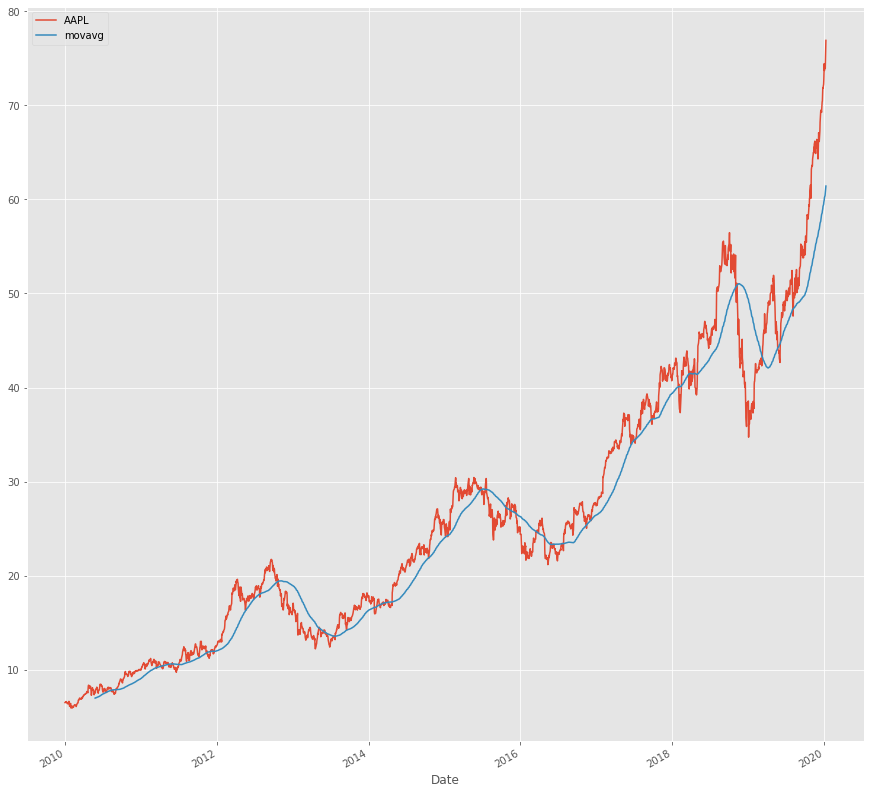

In [10]:
close_px.plot(label = 'AAPL')
movavg.plot(label = 'movavg')
plt.legend()
plt.show()

# Expected Return 

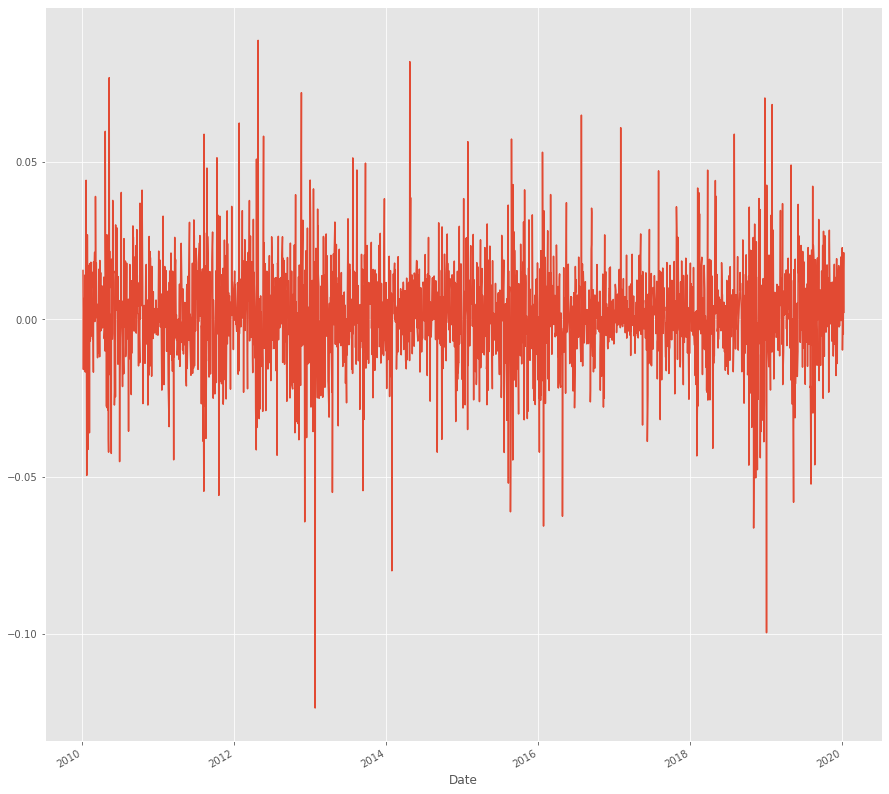

In [11]:
#Expected Return measures the mean, or expected value, of the probability distribution of investment returns.
rets = close_px / close_px.shift(1) - 1
rets.plot(label = 'return')
plt.show()

# COMPARING AND ANALYSING FELLOW COMPETITORS' STOCKS

In [12]:
df.comp = web.DataReader(['AAPL', 'GE', 'GOOG', 'IBM', 'MSFT'], 'yahoo', start = start, end = end)['Adj Close']
df.comp.head(10)

<ipython-input-12-9f5c30a4b9e2>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.comp = web.DataReader(['AAPL', 'GE', 'GOOG', 'IBM', 'MSFT'], 'yahoo', start = start, end = end)['Adj Close']


Symbols,AAPL,GE,GOOG,IBM,MSFT
Date,,,,,
2009-12-31,6.492369,10.773933,308.832428,92.667847,23.739305
2010-01-04,6.593423,11.001803,312.204773,93.765137,24.105360
2010-01-05,6.604822,11.058768,310.829926,92.632462,24.113148
2010-01-06,6.499765,11.001803,302.994293,92.030708,23.965164
2010-01-07,6.487749,11.571475,295.940735,91.712120,23.715933
2010-01-08,6.530882,11.820707,299.885956,92.632462,23.879499
2010-01-11,6.473268,11.934643,299.432648,91.662582,23.575750
2010-01-12,6.399635,11.941763,294.137512,92.391747,23.419973
2010-01-13,6.489905,11.984488,292.448822,92.193535,23.638054


# CORRELATION ANALYSIS
Here, the correlation function (corr) is used to find the pairwise correlation of all columns in the dataframe.

In [13]:
retscomp = df.comp.pct_change()
corr = retscomp.corr()
retscomp.head(10)

Symbols,AAPL,GE,GOOG,IBM,MSFT
Date,,,,,
2009-12-31,NaN,NaN,NaN,NaN,NaN
2010-01-04,0.015565,0.021150,0.010920,0.011841,0.015420
2010-01-05,0.001729,0.005178,-0.004404,-0.012080,0.000323
2010-01-06,-0.015906,-0.005151,-0.025209,-0.006496,-0.006137
2010-01-07,-0.001849,0.051780,-0.023280,-0.003462,-0.010400
2010-01-08,0.006648,0.021539,0.013331,0.010035,0.006897
2010-01-11,-0.008822,0.009639,-0.001512,-0.010470,-0.012720
2010-01-12,-0.011375,0.000597,-0.017684,0.007955,-0.006608
2010-01-13,0.014105,0.003578,-0.005741,-0.002145,0.009312


# USING A HEAT MAP TO SHOW THE RESULTS OF CORRELATION
THE LIGHTER THE COLOR, THE MORE CORRELATED THE STOCKS ARE.

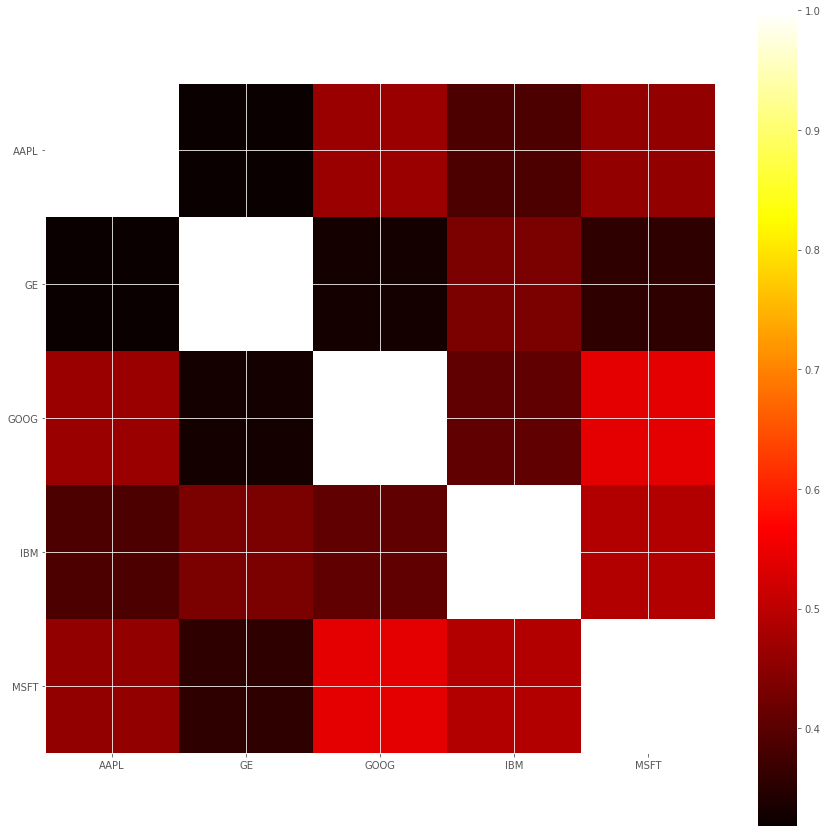

In [14]:
plt.imshow(corr, cmap = 'hot', interpolation = 'none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns)
plt.yticks(range(len(corr)), corr.columns);

# PERFORMING PRE-PROCESSING AND ANALYSIS ON NEWS_HEADLINES DATASEET OF "Times of India"

NUMERICAL ANALYSIS

In [15]:
news_data = pd.read_csv("india-news-headlines.csv")

In [16]:
news_data.head(10)

,publish_date,headline_category,headline_text
0,20010101,sports.wwe,win over cena satisfying but defeating underta...
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
2,20010102,unknown,Fissures in Hurriyat over Pak visit
3,20010102,unknown,America's unwanted heading for India?
4,20010102,unknown,For bigwigs; it is destination Goa
5,20010102,unknown,Extra buses to clear tourist traffic
6,20010102,unknown,Dilute the power of transfers; says Riberio
7,20010102,unknown,Focus shifts to teaching of Hindi
8,20010102,unknown,IT will become compulsory in schools
9,20010102,unknown,Move to stop freedom fighters' pension flayed


In [17]:
news_data.tail(10)

,publish_date,headline_category,headline_text
3297162,20200630,city.kanpur,vehicle of up stf team bringing gangster vikas...
3297163,20200630,entertainment.hindi.bollywood,sushant singh rajputs demise fans trend cbifor...
3297164,20200630,entertainment.hindi.bollywood,amitabh bachchans grandson agastya nanda prepp...
3297165,20200630,home.education,icse isc result 2020 when where to check class...
3297166,20200630,city.lucknow,up govt imposes weekend restrictions from tonight
3297167,20200630,gadgets-news,why tiktok removed 1 65 crore videos in india
3297168,20200630,entertainment.hindi.bollywood,apurva asrani calls alia bhatts mother soni ra...
3297169,20200630,entertainment.hindi.bollywood,kangana ranaut gets a doll version of herself ...
3297170,20200630,entertainment.hindi.bollywood,meezaan jaffrey reminisces his childhood days ...
3297171,20200630,entertainment.telugu.movies.news,prabhas20 titled as radhe shyam prabhas and po...


In [18]:
#info() method returns a concise summary of the dataset.
news_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3297172 entries, 0 to 3297171
Data columns (total 3 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   publish_date       int64 
 1   headline_category  object
 2   headline_text      object
dtypes: int64(1), object(2)
memory usage: 75.5+ MB


In [19]:
#describe() gives the statistical data of the dataframe.
news_data.describe()

,publish_date
count,3.297172e+06
mean,2.012470e+07
std,4.896213e+04
min,2.001010e+07
25%,2.009101e+07
50%,2.013071e+07
75%,2.016110e+07
max,2.020063e+07


In [20]:
news_data.max()

publish_date                                                  20200630
headline_category                                          young-turks
headline_text        ~!The 7 Plexus Knots story in a Galaxy called ...
dtype: object

In [21]:
news_data.min()

publish_date                                20010101
headline_category                   2008-in-pictures
headline_text         15cr funds for two auditoriums
dtype: object

In [22]:
#returns the unique objects.
news_data['headline_category'].unique()

array(['sports.wwe', 'unknown', 'entertainment.hindi.bollywood', ...,
       'elections.assembly-elections.delhi-assembly-elections',
       'elections.assembly-elections.delhi', 'life-style.coronavirus'],
      dtype=object)

In [23]:
#checking for null values.
news_data.isnull().any()

publish_date         False
headline_category    False
headline_text        False
dtype: bool

In [24]:
news_data.corr()

,publish_date
publish_date,1.0


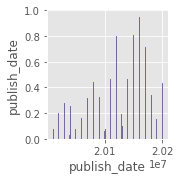

In [25]:
sns.set_palette('viridis')
sns.pairplot(news_data)
plt.show()

In [26]:
news_data['headline_text'].value_counts()

Sunny Leone HOT photos                                                                98
Watch top news in one-minute                                                          90
Official Site                                                                         89
Football: Italian Serie A table                                                       88
Football: Spanish La Liga table                                                       86
                                                                                      ..
Builder breaches bail conditions; flies to Dubai                                       1
Indians would rather spend on shoes; than books                                        1
Delhi Police ACP Niyati Mittal Kashyap: I can go anywhere at any hour without fear     1
Advani hurls brickbats at Cong                                                         1
Challenge for socialists as Venezuelans elect legislature                              1
Name: headline_text, 

In [27]:
news_data['headline_category'].value_counts()

india                      285619
unknown                    207732
city.mumbai                132649
city.delhi                 124658
business.india-business    115246
                            ...  
sports.headline3                7
ballot-talk                     7
did-you-know                    6
sports.headline6                3
party-manifestos                2
Name: headline_category, Length: 1016, dtype: int64

# EXPLORATORY DATA ANALYSIS USING NLP AND NLTK TOOLS

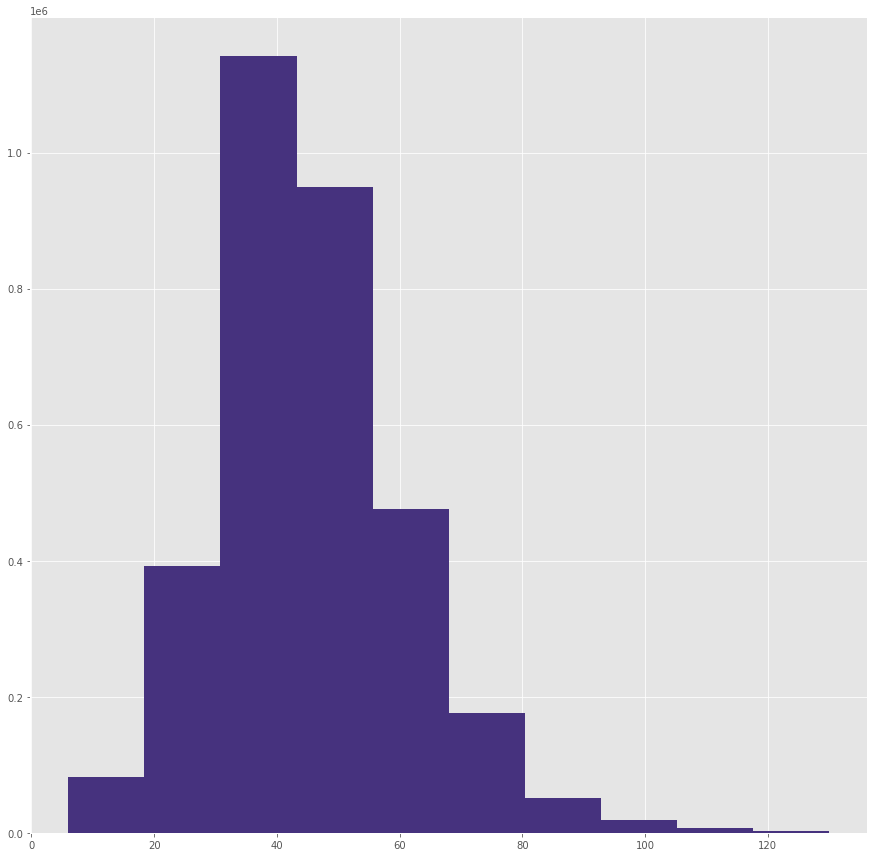

In [28]:
news_data['headline_text'].str.len().hist()
plt.show()

Here, we can see that the character length of news headlines is 10 to 70

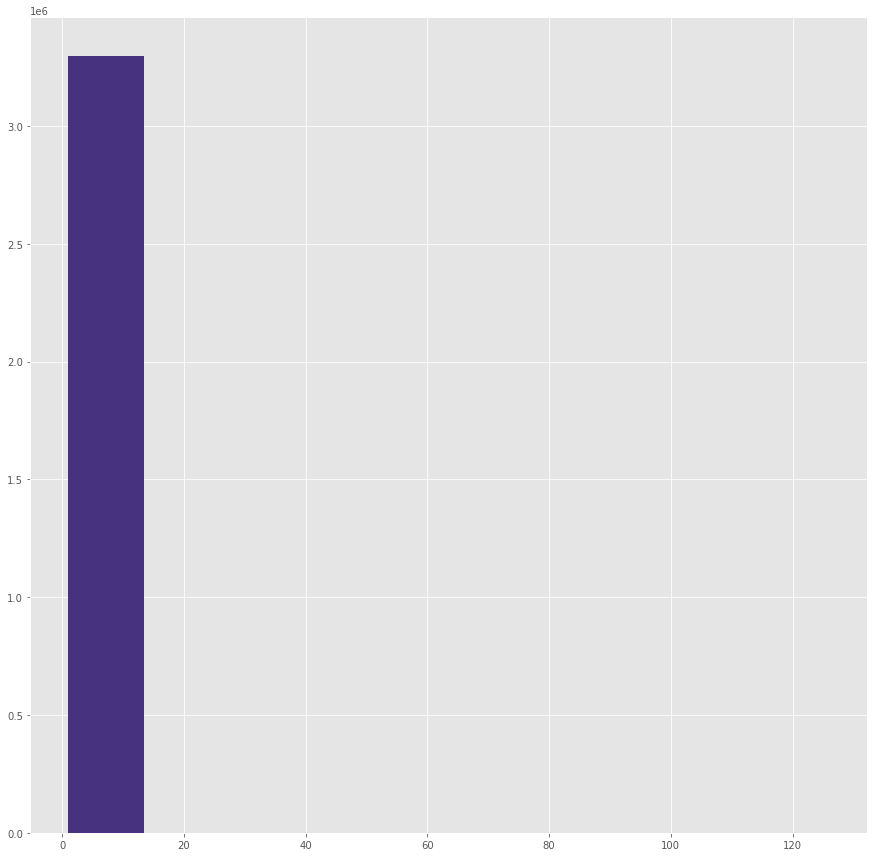

In [29]:
news_data['headline_text'].str.split().\
    apply(lambda x : [len(i) for i in x]).\
    map(lambda x : np.mean(x)).hist()
plt.show()

Here, we can see that the range of words in headlines is from 1 to 18, 10 being the most common number of words.

In [31]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [32]:
corpus = []
new = news_data['headline_text'].str.split()
new = new.values.tolist()
corpus = [word for i in new for word in i]

In [33]:
from collections import defaultdict

dict = defaultdict(int)
for word in corpus:
    if word in stop:
        dict[word]+=1

In [34]:
#counting and storing the total number of occurrences of each word in a tuple.
from collections import Counter

counter = Counter(corpus)
most = counter.most_common()
x, y = [], []
for word, count in most[:40]:
    if (word not in stop):
        x.append(word)
        y.append(count)

# THE MOST COMMON WORDS USED IN NEWS HEADLINES OVER THE PAST 15 YEARS.

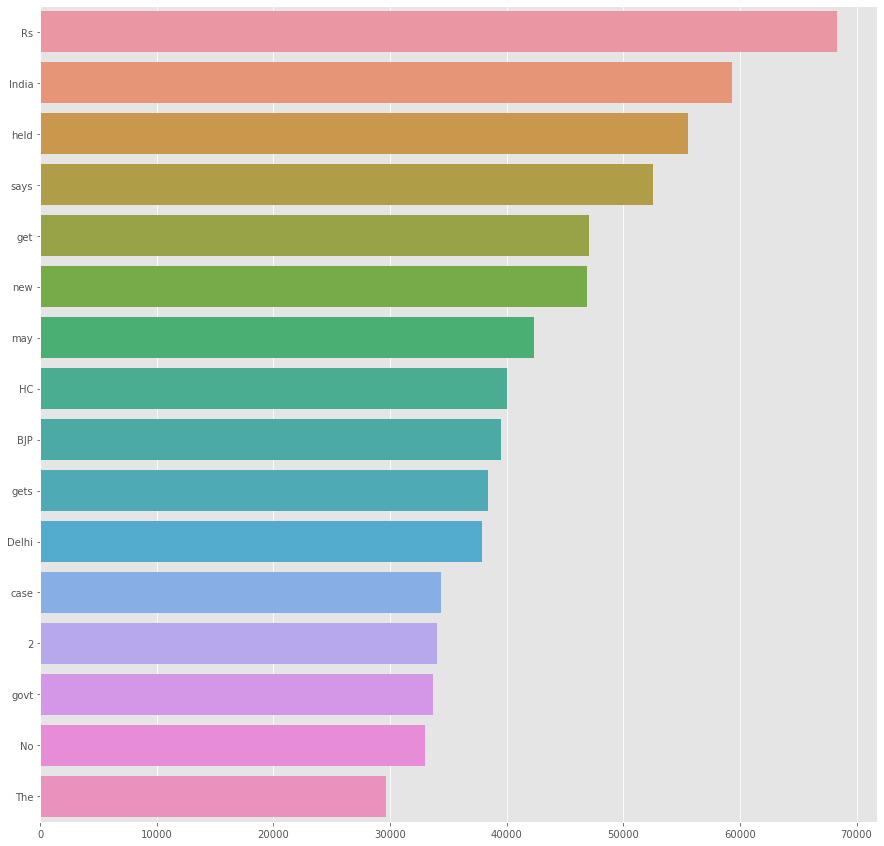

In [35]:
sns.barplot(x = y , y = x)
plt.show()

# NGRAM EXPLORATION
ngram --> n number of words

In [36]:
from nltk.util import ngrams
list(ngrams(['I' , 'went', 'to', 'the', 'river', 'bank'], 2))

[('I', 'went'),
 ('went', 'to'),
 ('to', 'the'),
 ('the', 'river'),
 ('river', 'bank')]

# TEXTBLOB
Textblob is a python library for processing textual data.
It is used to dive into NLP tasks for sentimental analysis and so on.

In [39]:
!pip install textblob

  Using cached textblob-0.15.3-py2.py3-none-any.whl (636 kB)


In [30]:
from textblob import TextBlob
TextBlob('Extra buses to clear tourist traffic').sentiment

Sentiment(polarity=0.05000000000000001, subjectivity=0.24166666666666664)

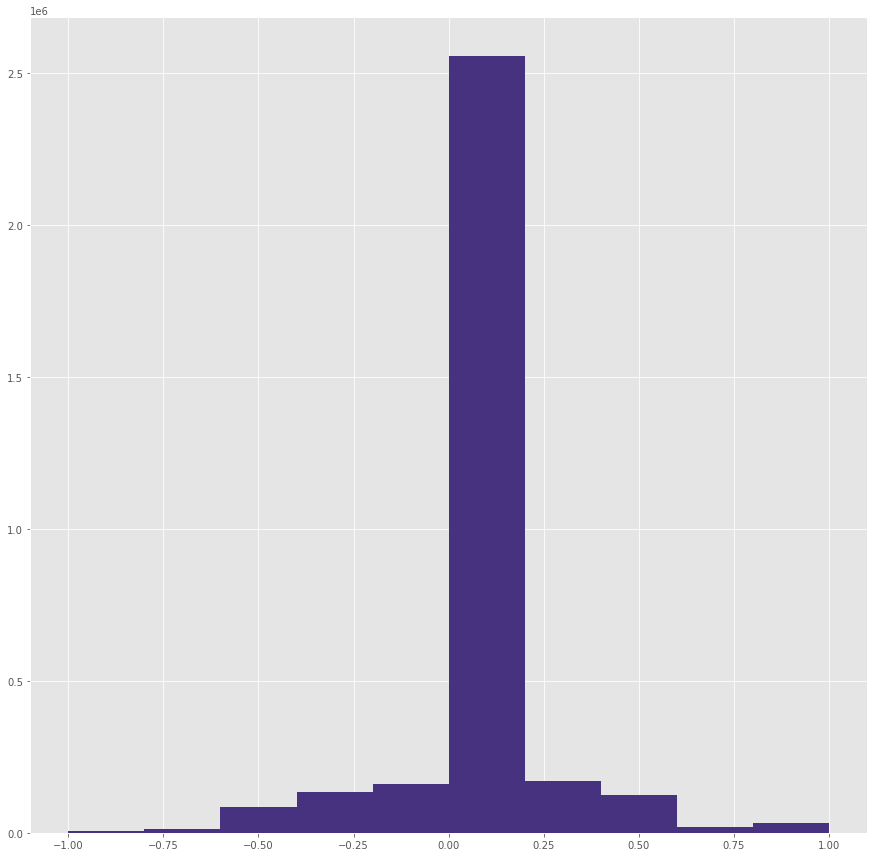

In [42]:
def polarity(text):
    return TextBlob(text).sentiment.polarity
news_data['polarity_score'] = news_data['headline_text'].\
   apply(lambda x : polarity(x))
news_data['polarity_score'].hist()
plt.show()

# END OF TASK 5